In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [11]:
(train_images,train_labels), (test_images,test_labels) = datasets.mnist.load_data()

In [14]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


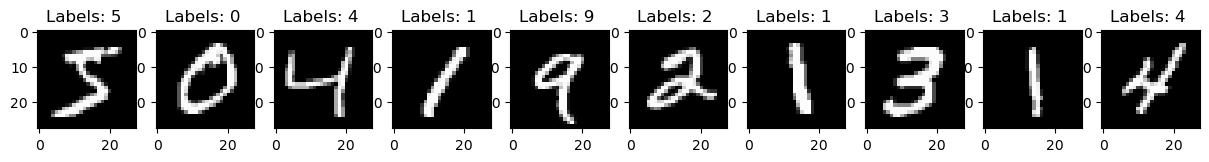

In [43]:
num_examples = 10 
plt.figure(figsize=(15, 3))

for i in range(num_examples):
    plt.subplot(2, num_examples, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title("Labels: {} " .format(train_labels[i]))
  

plt.show()

In [46]:
from tensorflow.keras.utils import to_categorical

# Assuming trainY and testY are the original integer labels
# Perform one-hot encoding for train_labels and test_labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [47]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [48]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

In [50]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [51]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
model

In [53]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 26s 30ms/step - loss: 0.1953 - accuracy: 0.9393 - val_loss: 0.0564 - val_accuracy: 0.9833
Epoch 2/5
844/844 [==============================] - 23s 27ms/step - loss: 0.0515 - accuracy: 0.9839 - val_loss: 0.0348 - val_accuracy: 0.9907
Epoch 3/5
844/844 [==============================] - 25s 29ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0346 - val_accuracy: 0.9907
Epoch 4/5
844/844 [==============================] - 25s 30ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0316 - val_accuracy: 0.9900
Epoch 5/5
844/844 [==============================] - 24s 28ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0322 - val_accuracy: 0.9912


In [54]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 2s 5ms/step - loss: 0.0291 - accuracy: 0.9908
Test Accuracy: 0.9908000230789185


In [56]:
# Generate predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 5ms/step


In [57]:
# Confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 977    0    0    0    0    0    0    3    0    0]
 [   2 1126    0    1    0    0    1    5    0    0]
 [   2    2 1021    0    1    0    0    6    0    0]
 [   0    0    2 1005    0    3    0    0    0    0]
 [   0    0    1    0  975    0    1    1    0    4]
 [   2    0    0    3    0  883    1    2    1    0]
 [   7    5    0    0    1    6  938    0    1    0]
 [   0    0    1    0    0    0    0 1027    0    0]
 [   4    0    2    1    0    2    0    3  961    1]
 [   2    0    0    0    2    2    0    5    3  995]]


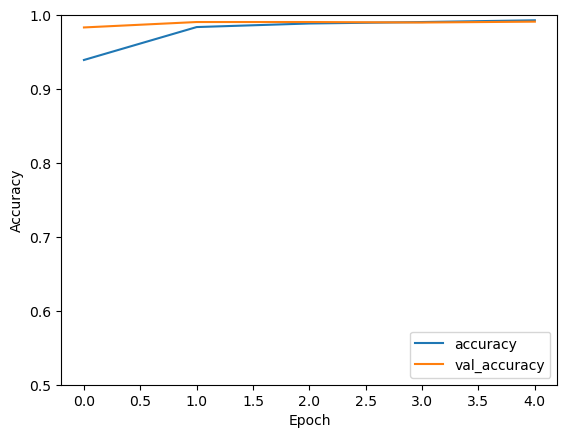

In [58]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()